In [129]:
# importing major libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
# importing additional libraries
from geopy.geocoders import Nominatim

In [130]:
# Loading the dataset

In [131]:
data = pd.read_csv("Indian-Resturants.csv")

In [132]:
pd.set_option('display.max_columns', 50)
data

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,NaN,1,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,282001.0,1,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,282010.0,1,"Shahganj, Agra","Fast Food, Mithai",9:30 AM to 11 PM,300,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,282002.0,1,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,NaN,1,"Tajganj, Agra","North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,390024.0,1,"Fatehgunj, Vadodara",North Indian,"11am – 3pm, 7pm – 11:30pm (Mon-Sun)",600,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,NaN,1,"Karelibaug, Vadodara",Fast Food,"4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm...",300,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,NaN,1,"Alkapuri, Vadodara","Gujarati, North Indian, Chinese","11:30 AM to 3:30 PM, 7:30 PM to 11 PM",700,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,NaN,1,"Akota, Vadodara","Fast Food, Sandwich, Salad",8 AM to 1 AM,500,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [133]:
# getting the columns name 
data.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [134]:
# info about the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

# details about the columns.
**NULL VALUES:** address(134) || zipcode(163187) || cuisines(1391) || timings(3874) || opentable_support(48).

**Data type:** 
- There are four columns of float type.
- Nine columns are of integer type.
- Thirteen columns are of object type.

**It contains a total of 26 columns.**

**It contains a total of 211944 entries.**

In [135]:
data.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [136]:
data.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


# Main detail about the dataset
- there is some row in the table which have "10000.00000" as there latitude which is invalid and also where the longitude and latitide is "0.000000" (this "0.000000" longitude and latitude is valid but based off of our data set these are invalid)
- there are rows with negaitve vote value
- there are some rows in average_cost_for_two column with 0 as there cost for food for 2 peoples 
- in the delivery column there are 3 different values 0,1,-1 which is also wrong 
- and the takeaway column only have -1 as there value which also does not explains anything 

In [137]:
duplicates = data.duplicated()
data[duplicates]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
101,3400059,Peshawri - ITC Mughal,['Fine Dining'],https://www.zomato.com/agra/peshawri-itc-mugha...,"ITC Mughal, Fatehabad Road, Tajganj, Agra",Agra,34,"ITC Mughal, Tajganj",27.161150,78.043993,NaN,1,"ITC Mughal, Tajganj, Agra","North Indian, Mughlai","12:30 PM to 2:45 PM, 7 PM to 11:45 PM",6000,4,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'De...",4.4,Very Good,353,154,0.0,-1,-1
116,3400060,Taj Bano - ITC Mughal,['Fine Dining'],https://www.zomato.com/agra/taj-bano-itc-mugha...,"ITC Mughal, Fatehabad Road, Tajganj, Agra",Agra,34,"ITC Mughal, Tajganj",27.161132,78.044022,NaN,1,"ITC Mughal, Tajganj, Agra","Mughlai, North Indian","6 AM to 10:30 AM, 12:30 PM to 2:30 PM, 7 PM to...",2500,4,Rs.,"['Credit Card', 'Lunch', 'Cash', 'Debit Card',...",4.3,Very Good,96,205,0.0,-1,-1
140,3400017,Pinch Of Spice,['Casual Dining'],https://www.zomato.com/agra/pinch-of-spice-civ...,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Agra,34,Civil Lines,27.201735,78.007625,NaN,1,"Civil Lines, Agra","North Indian, Chinese, Mughlai","12 Noon to 4 PM, 7 PM to 11:30 PM",1600,4,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'Dinner',...",4.6,Excellent,915,105,0.0,1,-1
141,3400018,Pinch Of Spice,['Casual Dining'],https://www.zomato.com/agra/pinch-of-spice-taj...,"1076/2, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.159649,78.043304,282010.0,1,"Tajganj, Agra","North Indian, Chinese, Continental",12 Noon to 11:30 PM (Mon-Sun),1600,4,Rs.,"['Delivery', 'Dinner', 'Cash', 'Credit Card', ...",4.6,Excellent,965,690,0.0,1,-1
142,3400850,Urban Deck,['Casual Dining'],https://www.zomato.com/agra/urban-deck-2-civil...,"5th Floor, The P L Palace Hotel, MG Road, Sanj...",Agra,34,Civil Lines,27.199573,78.003699,282005.0,1,"Civil Lines, Agra","Mexican, Italian, North Indian",1PM to 12Midnight (Mon-Sun),1600,4,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Takeaway Ava...",4.3,Very Good,672,192,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211937,18855810,Biryani aur Baatein,['Casual Dining'],https://www.zomato.com/vadodara/biryani-aur-ba...,"Shop 14, Atlantis K-10, A Wing, Genda Circle R...",Vadodara,32,Alkapuri,22.317746,73.168043,NaN,1,"Alkapuri, Vadodara","Biryani, Mughlai, Chinese","11:30am – 3:30pm, 7:30pm – 1am (Mon-Sun)",500,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,154,96,0.0,-1,-1
211938,18662583,Wok On Fire,['Casual Dining'],https://www.zomato.com/vadodara/wok-on-fire-fa...,"Ground Floor 1, Rossette Building, Opposite Se...",Vadodara,32,Fatehgunj,22.323357,73.187461,NaN,1,"Fatehgunj, Vadodara","Chinese, Asian",11 AM to 11 PM,1000,3,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,301,126,0.0,1,-1
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,390024.0,1,"Fatehgunj, Vadodara",North Indian,"11am – 3pm, 7pm – 11:30pm (Mon-Sun)",600,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,NaN,1,"Alkapuri, Vadodara","Gujarati, North Indian, Chinese","11:30 AM to 3:30 PM, 7:30 PM to 11 PM",700,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1


In [138]:
# droping the duplicate rows in the dataset
data.drop_duplicates(inplace=True)

In [139]:
# checking for all the null values in the new dataset 
data.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 47869
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1070
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          19
delivery                    0
takeaway                    0
dtype: int64

# Null Values:
- address: 18
- zipcode: 47869
- cuisines: 470
- timings: 1070
- opentable_support: 19

## Data Cleaning Steps:

### 1. Removing Null Values:

#### a. Removing Zipcode:
We don't need the Zipcode column because we already have the address, city, city_id, and longitude and latitude coordinates. So, we can safely drop it.

#### b. Filling Cuisines with "Unknown":
Since we don't know what kind of cuisines the restaurants offer for the missing values in the cuisines column, we can fill them with "Unknown" to indicate that the information is not available.

#### c. Removing Timings:
The timings column contains various formats like "8:30am – 10:30pm (Mon-Sun)" or "12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat)", which are not consistent. As we don't need this level of detail, we can safely drop the timings column.

#### d. Filling Opentable Support with Mode:
Opentable_support column has only one type of data which is "0.0". We can fill the missing values with the mode, which is "0.0", to maintain consistency.

#### e. Filling Missing Addresses:
For the missing 18 addresses, we can use the geopy.geocoders package to find and fill in the missing information automatically. This ensures completeness in our dataset.


In [140]:
# droping the zipcode column
data.drop(columns=['zipcode'], inplace=True)

In [141]:
# filling the cuisines with "unknown"
data.cuisines = data.cuisines.apply(lambda x: "unknown" if pd.isna(x) else x)

In [142]:
# removing the timing column
data.drop(columns=['timings'], inplace=True)

In [143]:
# filling the data with the help of mode 
data.opentable_support = data.opentable_support.apply(lambda x: data.opentable_support.mode() if pd.isna(x) else x)

In [144]:
# filling the missing addresses using the geopy 
geolocator = Nominatim(user_agent="my_geocoder")

def fill_address(row):
    if pd.isnull(row['address']):
        if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
            location = geolocator.reverse((row['latitude'], row['longitude']), exactly_one=True)
            if location:
                address = location.raw.get('address')
                if address:
                    return location.address
    return row['address']

data['address'] = data.apply(fill_address, axis=1)

data


,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,country_id,locality_verbose,cuisines,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,1,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,1,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,1,"Shahganj, Agra","Fast Food, Mithai",300,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,1,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",300,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,1,"Tajganj, Agra","North Indian, Continental, Italian",1000,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,['Dessert Parlour'],https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,1,"Manjalpur, Vadodara",Ice Cream,200,1,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1,0.0,1,-1
211925,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,1,"Alkapuri, Vadodara","Gujarati, North Indian, Chinese",700,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211926,18019952,Geeta lodge,['Casual Dining'],https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,1,"Alkapuri, Vadodara","Gujarati, Street Food",250,1,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,1,"Karelibaug, Vadodara",Fast Food,300,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1


In [145]:
# checking for any other null values
data.isnull().sum()

res_id                  0
name                    0
establishment           0
url                     0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
country_id              0
locality_verbose        0
cuisines                0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64

In [146]:
# saving a cleaned csv file of the data set
data.to_csv("Cleaned_Indian-Resturants.csv")

## Exploratory Data Analysis (EDA):

Now that we've cleaned our data, it's time to explore it!

# Calculate and visualize the average rating of restaurants. Analyze the distribution of restaurant ratings to understand the overall rating landscape.

In [147]:
data

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,country_id,locality_verbose,cuisines,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,1,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,1,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,1,"Shahganj, Agra","Fast Food, Mithai",300,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,1,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",300,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,1,"Tajganj, Agra","North Indian, Continental, Italian",1000,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,['Dessert Parlour'],https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,1,"Manjalpur, Vadodara",Ice Cream,200,1,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1,0.0,1,-1
211925,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,1,"Alkapuri, Vadodara","Gujarati, North Indian, Chinese",700,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211926,18019952,Geeta lodge,['Casual Dining'],https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,1,"Alkapuri, Vadodara","Gujarati, Street Food",250,1,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,1,"Karelibaug, Vadodara",Fast Food,300,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1


In [148]:
avg_rating = data.groupby("name").agg({"aggregate_rating":"mean"}).reset_index()
count_rest = data["name"].value_counts().reset_index()
count_rest.columns = ['name', 'count']

result = pd.merge(avg_rating, count_rest, on='name')
result = result.sort_values(by = "count", ascending = False)
result

,name,aggregate_rating,count
10302,Domino's Pizza,3.669212,406
6054,Cafe Coffee Day,2.935294,323
17982,KFC,3.831418,261
34434,Subway,3.600474,211
18820,Keventers,3.704808,208
...,...,...,...
15224,Hotel Jain Excellency,3.500000,1
15223,Hotel Jain Bhoj,3.800000,1
15222,Hotel Jai Maa,3.000000,1
15221,Hotel Jai Hind Dhaba,3.200000,1


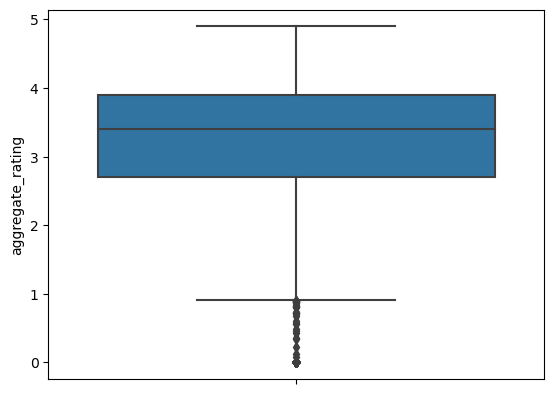

Mean Rating 3.032868232451132
Median Rating 3.5
Mode Rating 0    0.0
Name: aggregate_rating, dtype: float64


In [149]:
sns.boxplot(result, y = "aggregate_rating")
plt.show()
mean_rating = data['aggregate_rating'].mean()
median_rating = data['aggregate_rating'].median()
mode_rating = data['aggregate_rating'].mode()
print(f"Mean Rating {mean_rating}")
print(f"Median Rating {median_rating}")
print(f"Mode Rating {mode_rating}")

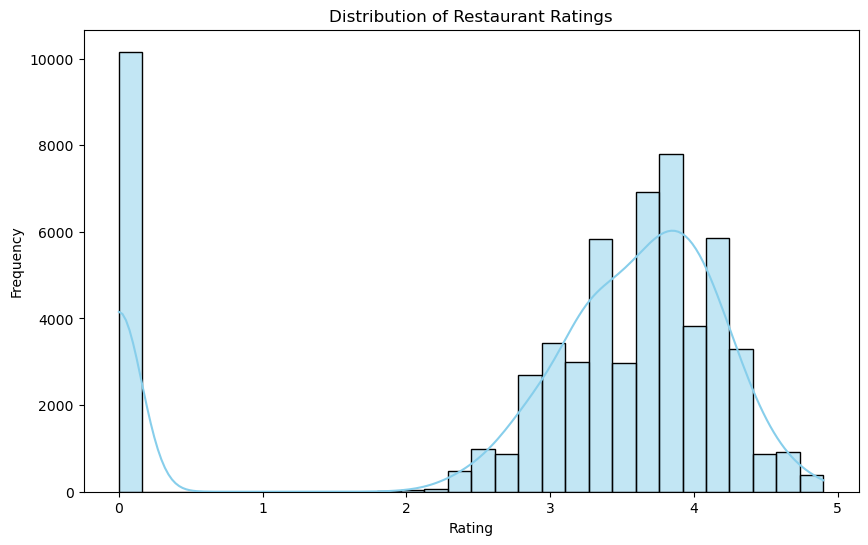

In [150]:
plt.figure(figsize=(10, 6))
sns.histplot(data['aggregate_rating'], bins=30, color='skyblue', kde = True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Insights from the Plots:

- We noticed that around 10,000 restaurants have a very low rating, from 0 to 0.1. This might be because these restaurants are new in town or they haven't become very popular yet.

- Surprisingly, there are about 10,000 restaurants with a rating of 0. This could mean that these restaurants might not be asking their customers to rate them. If a restaurant is really bad, it should have at least some ratings, right?

- On the bright side, most of the restaurants have an average rating of 3.0. That's pretty good! 

- It's awesome to see that many restaurants have a very good rating! This tells us that the restaurants we show on our website are doing a great job. 

These insights help us understand how our website is doing and how we can improve it to make it even better for everyone!


#  Identify the city with the highest concentration of restaurants. Visualize the distribution of restaurant ratings across different cities.

In [151]:
cities_rest = data.groupby("city").agg({"name":"count", "aggregate_rating": "mean"}).sort_values(by = "name",ascending = False).reset_index()


In [152]:
cities_rest.rename(columns={"name": "restaurant_count"}, inplace = True)
cities_rest.aggregate_rating = cities_rest.aggregate_rating.apply(lambda x: round(x,1))
cities_rest.head(30)

,city,restaurant_count,aggregate_rating
0,Chennai,2612,3.7
1,Mumbai,2538,3.8
2,Bangalore,2365,3.7
3,Pune,1911,3.5
4,New Delhi,1847,3.8
5,Jaipur,1456,3.5
6,Kolkata,1413,3.8
7,Ahmedabad,1329,3.3
8,Lucknow,1290,3.4
9,Goa,1169,3.1


<Axes: ylabel='restaurant_count'>

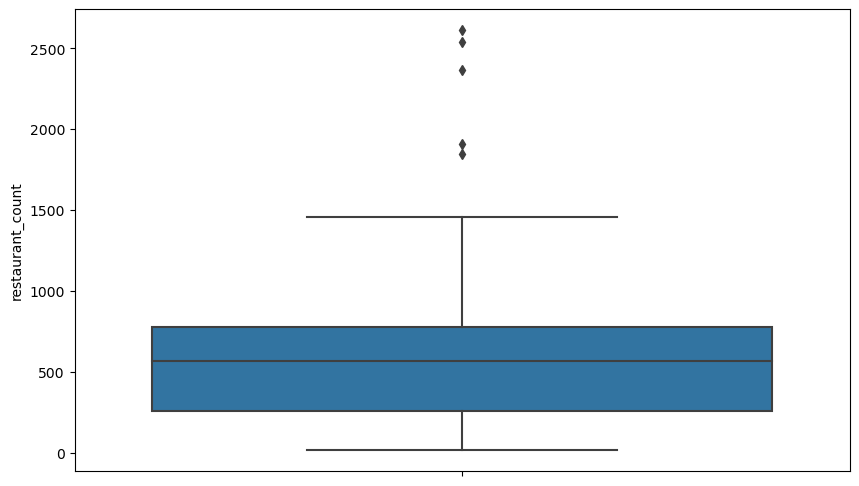

In [153]:
plt.figure(figsize=(10, 6))
sns.boxplot(cities_rest,y = cities_rest.restaurant_count)

# Statistical Summary of Restaurants Count per City

- The average number of restaurants per city is 610.
- There are approximately 16 cities with 1000 or more restaurants.
- The are 3 top cities have 2000+ restaurants.

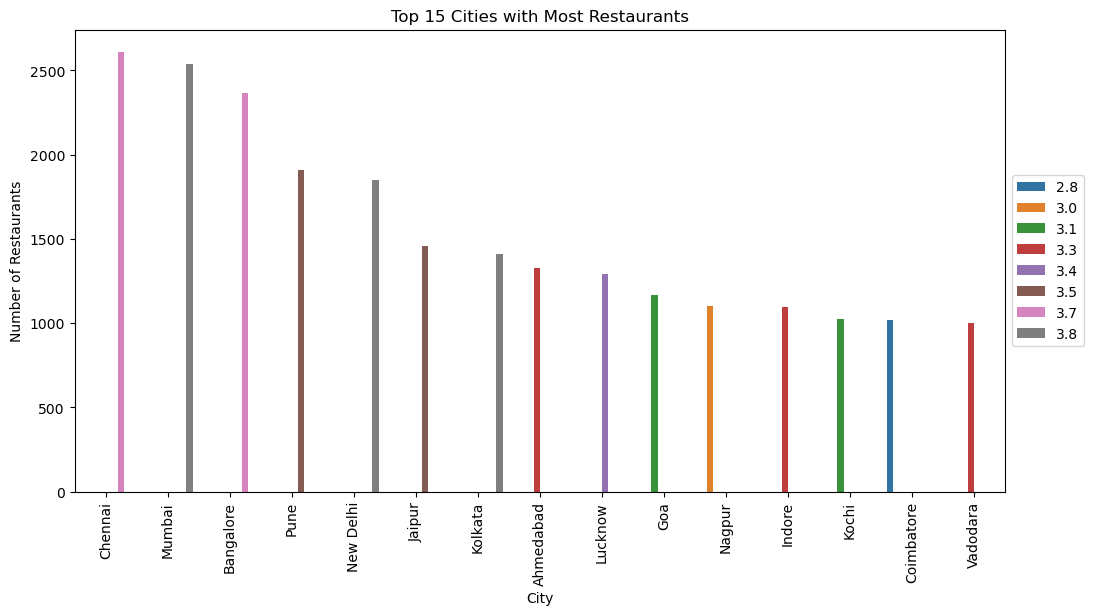

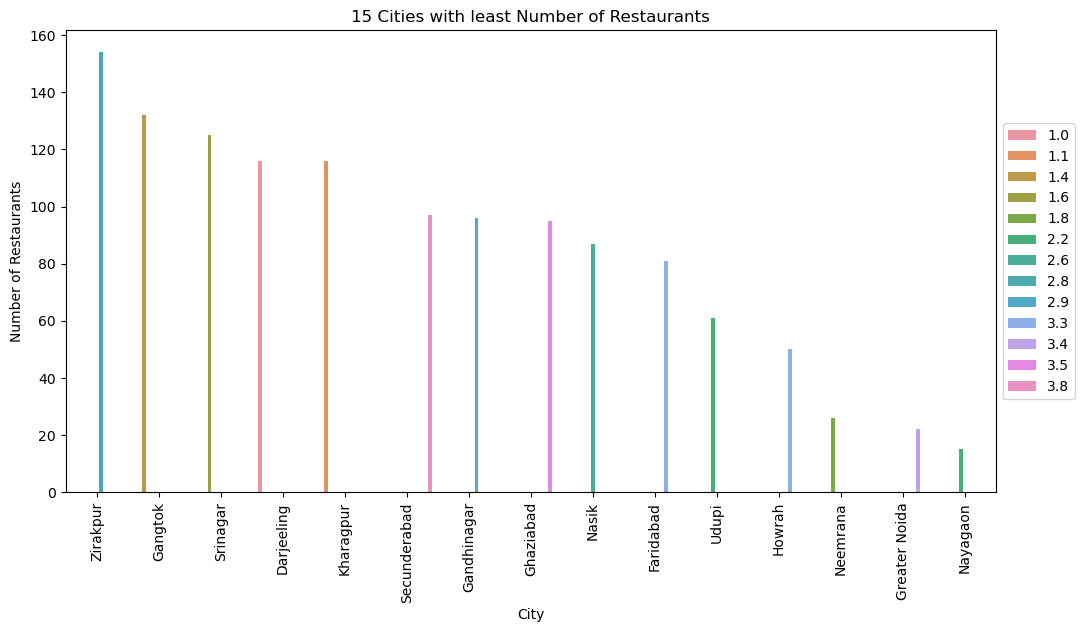

In [154]:
plt.figure(figsize=(12, 6))
sns.barplot(data = cities_rest.head(15),x = 'city', y = 'restaurant_count', hue = "aggregate_rating")
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Top 15 Cities with Most Restaurants')
plt.xticks(rotation=90) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data = cities_rest.tail(15),x = 'city', y = 'restaurant_count', hue = "aggregate_rating")
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('15 Cities with least Number of Restaurants')
plt.xticks(rotation=90) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Analysis of Restaurants in Indian Cities

## Top 15 Cities:
- All top 15 cities have restaurant ratings above 3, except one which has a rating of 2.8. However, even 2.8 is considered good since there are over 1000 restaurants in that city.
- These cities are the most famous in India, with large populations and many companies.
- New Delhi, Kolkata, and Mumbai have the highest overall ratings.
- Chennai has the most restaurants with an overall rating of 3.7.

## Bottom 15 Cities:
- Some cities in this list have ratings ranging from 2.2 to 3.8, which is still decent.
- However, many cities have low overall ratings despite having many restaurants. This could be due to their low population, poor food quality, remote location, or strong competition from established restaurants nearby.


#  Determine the most popular cuisines among the listed restaurants. Investigate if there's a correlation between the variety of cuisines offered and restaurant ratings.

In [155]:
data

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,country_id,locality_verbose,cuisines,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,1,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,1,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,1,"Shahganj, Agra","Fast Food, Mithai",300,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,1,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",300,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,1,"Tajganj, Agra","North Indian, Continental, Italian",1000,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,['Dessert Parlour'],https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,1,"Manjalpur, Vadodara",Ice Cream,200,1,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1,0.0,1,-1
211925,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,1,"Alkapuri, Vadodara","Gujarati, North Indian, Chinese",700,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211926,18019952,Geeta lodge,['Casual Dining'],https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,1,"Alkapuri, Vadodara","Gujarati, Street Food",250,1,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,1,"Karelibaug, Vadodara",Fast Food,300,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1


In [156]:
data["cuisines"] = data['cuisines'].apply(lambda x: x.split(",") if isinstance(x, str) else [])


In [157]:
unique_cuisines = set()
data.cuisines.apply(lambda x: [unique_cuisines.add(i) for i in x ])

0               [None, None, None, None, None]
1         [None, None, None, None, None, None]
2                                 [None, None]
3                     [None, None, None, None]
4                           [None, None, None]
                          ...                 
211882                                  [None]
211925                      [None, None, None]
211926                            [None, None]
211940                                  [None]
211942                      [None, None, None]
Name: cuisines, Length: 60417, dtype: object

In [158]:
unique_cuisines_count = {}

for i in unique_cuisines:
    unique_cuisines_count[i] = 0
    for j in data["cuisines"]:
        if i in j:
            unique_cuisines_count[i] += 1

In [189]:
def remove_leading_spaces(dictionary):
    cleaned_dict = {}
    for key, value in dictionary.items():
        cleaned_key = key.strip() 
        cleaned_dict[cleaned_key] = value
    return cleaned_dict

cleaned_dict = remove_leading_spaces(unique_cuisines_count)


In [190]:
cusine_df = pd.DataFrame.from_dict(cleaned_dict, orient='index', columns=['cusine_count']).reset_index()
cusine_df.columns = ['cusine', 'cusine_count']
cusine_df = cusine_df.sort_values(by = "cusine_count", ascending = False)

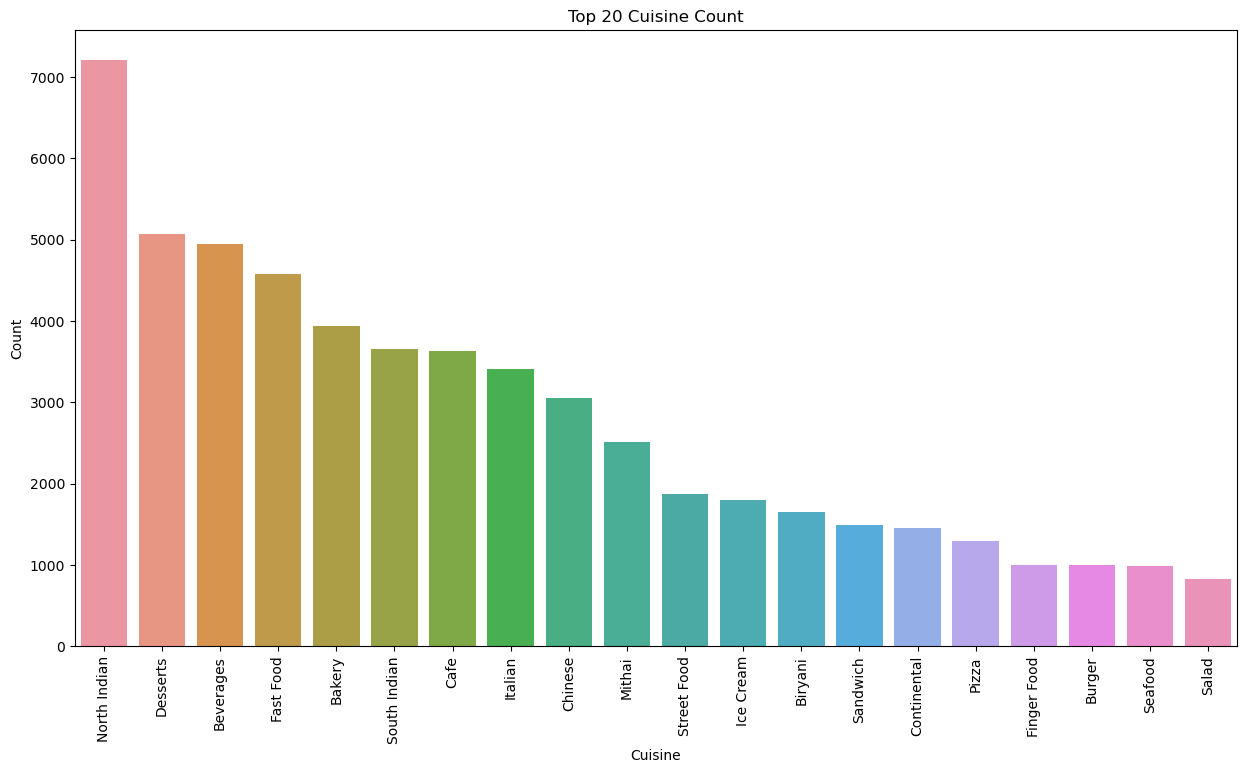

In [194]:
plt.figure(figsize=(15, 8))
sns.barplot(data=cusine_df.head(20), x='cusine', y='cusine_count')
plt.title('Top 20 Cuisine Count')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()



# Most Popular 20 Cuisines

- There are about 134 different types of cuisines available from all over the world.
- The top 5 cuisines are:
  1. North Indian
  2. Desserts
  3. Beverages
  4. Fast Food
  5. Bakery
  
- These top 5 cuisines are available in more than 4000 restaurants each.
- Specifically, North Indian cuisine is available in more than 7000 restaurants.


In [162]:
data["cuisines_count"]=data.cuisines.apply(lambda x: len(x))

In [163]:
cuisine_restaurant_count = data.groupby("name").agg({"aggregate_rating": "mean", "cuisines_count":"max"}).sort_values(by = "cuisines_count", ascending = False).reset_index()

In [199]:
new_result = pd.merge(cuisine_restaurant_count, count_rest, on='name')
new_result.sort_values(by = "count", ascending = False).

,name,aggregate_rating,cuisines_count,count
22995,Domino's Pizza,3.669212,2,406
1829,Cafe Coffee Day,2.935294,5,323
25077,KFC,3.831418,2,261
317,Subway,3.600474,7,211
7945,Keventers,3.704808,3,208
...,...,...,...,...
16109,Minus 301 Degrees F,3.900000,2,1
16108,Minus 10 Degree,0.000000,2,1
16107,Minty- The Cake Shop,2.800000,2,1
16106,Milkmade Ice Cream,3.600000,2,1


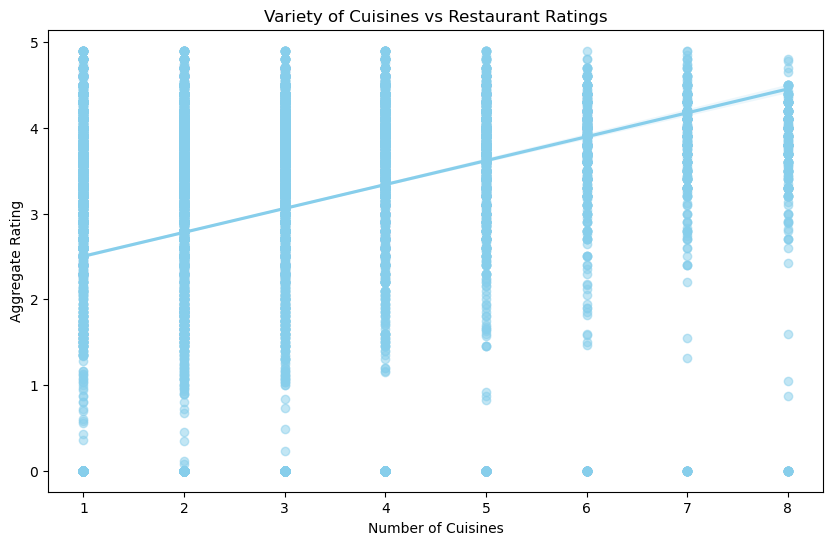

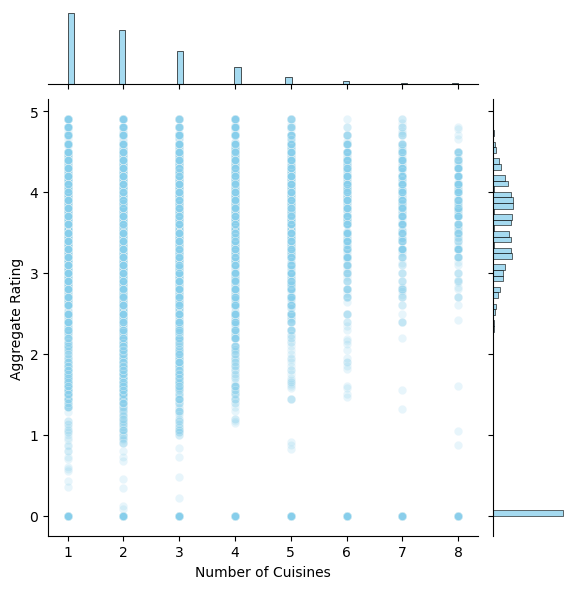

In [166]:
plt.figure(figsize=(10, 6))
sns.regplot(data=new_result, x='cuisines_count', y='aggregate_rating', color='skyblue', scatter_kws={'alpha':0.5})
plt.title('Variety of Cuisines vs Restaurant Ratings')
plt.xlabel('Number of Cuisines')
plt.ylabel('Aggregate Rating')
plt.show()

sns.jointplot(data=new_result, x='cuisines_count', y='aggregate_rating', kind='scatter', color='skyblue', alpha=0.2)
plt.xlabel('Number of Cuisines')
plt.ylabel('Aggregate Rating')
plt.show()

# Analysis of Number of Cuisines Offered by Restaurants and Their Ratings

- From the graph, we can see that only a few restaurants offer many different types of cuisines (e.g., 5 or 8).
- Interestingly, these restaurants have a wide range of ratings, from 2.8 to 4.6 on average.
- This suggests that restaurants offering a greater variety of cuisines tend to have higher ratings.
- However, there are also many restaurants with fewer cuisines but higher ratings.
- Surprisingly, there are over 10,000 restaurants offering many cuisines but have a 0 rating. This could be because they are new restaurants or due to other reasons.


# Analyze the relationship between price range and restaurant ratings. Visualize the average cost for two people in different price categories.

In [167]:
data

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,country_id,locality_verbose,cuisines,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway,cuisines_count
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,1,"Khandari, Agra","[North Indian, South Indian, Mithai, Street...",700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1,5
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,1,"Agra Cantt, Agra","[North Indian, Mughlai, Rolls, Chinese, Fa...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1,6
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,1,"Shahganj, Agra","[Fast Food, Mithai]",300,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1,2
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,1,"Civil Lines, Agra","[Desserts, Bakery, Fast Food, South Indian]",300,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1,4
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,1,"Tajganj, Agra","[North Indian, Continental, Italian]",1000,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,['Dessert Parlour'],https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,1,"Manjalpur, Vadodara",[Ice Cream],200,1,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1,0.0,1,-1,1
211925,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,1,"Alkapuri, Vadodara","[Gujarati, North Indian, Chinese]",700,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1,3
211926,18019952,Geeta lodge,['Casual Dining'],https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,1,"Alkapuri, Vadodara","[Gujarati, Street Food]",250,1,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1,2
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,1,"Karelibaug, Vadodara",[Fast Food],300,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1,1


<Axes: >

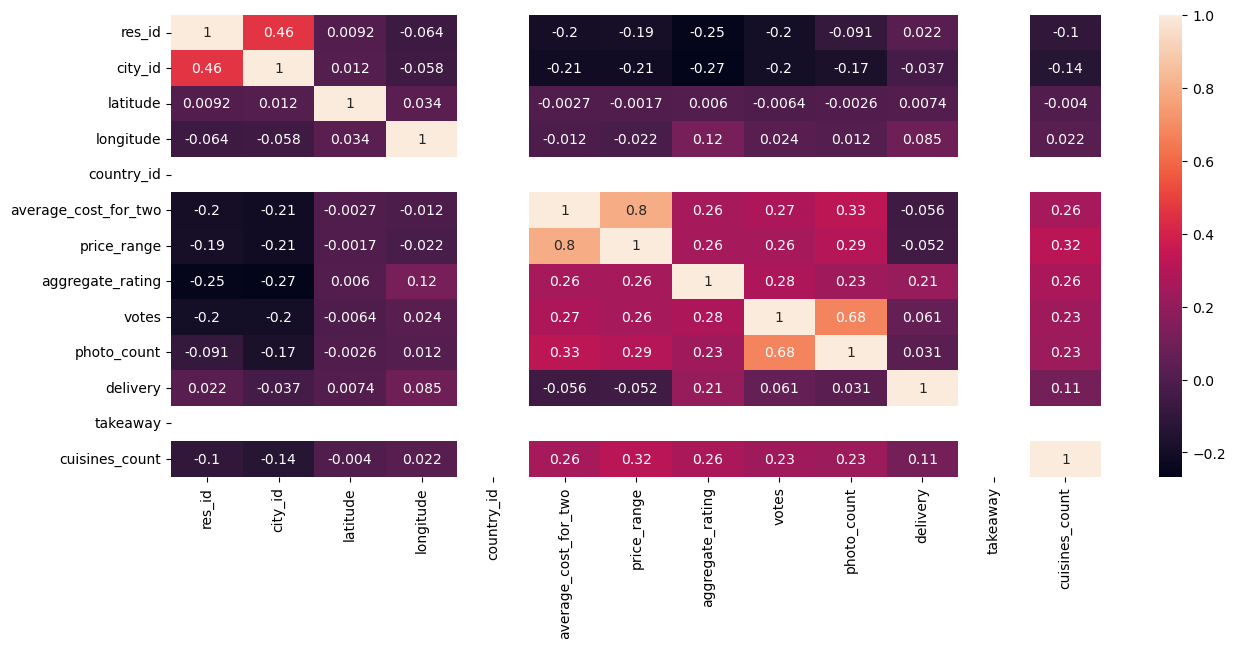

In [168]:
plt.figure(figsize=(15, 6))
sns.heatmap(data.corr(numeric_only = True),annot = True)

C:\Users\Rohan verma\AppData\Local\Temp\ipykernel_10088\431397611.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = data, y = "average_cost_for_two", x = "price_range", ci = False)


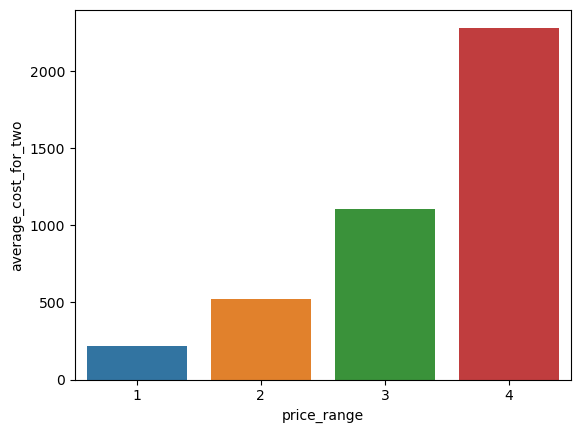

price_range
1     219.208605
2     524.777941
3    1104.843874
4    2283.108568
Name: average_cost_for_two, dtype: float64


In [169]:
sns.barplot(data = data, y = "average_cost_for_two", x = "price_range", ci = False)
plt.show()
avg_per_person = data.groupby("price_range")["average_cost_for_two"].mean()
print(avg_per_person)

# Investigate the impact of online order availability on restaurant ratings. Analyze the distribution of restaurants that offer table booking.--------------

In [170]:
data

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,country_id,locality_verbose,cuisines,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway,cuisines_count
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,1,"Khandari, Agra","[North Indian, South Indian, Mithai, Street...",700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1,5
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,1,"Agra Cantt, Agra","[North Indian, Mughlai, Rolls, Chinese, Fa...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1,6
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,1,"Shahganj, Agra","[Fast Food, Mithai]",300,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1,2
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,1,"Civil Lines, Agra","[Desserts, Bakery, Fast Food, South Indian]",300,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1,4
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,1,"Tajganj, Agra","[North Indian, Continental, Italian]",1000,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,['Dessert Parlour'],https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,1,"Manjalpur, Vadodara",[Ice Cream],200,1,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1,0.0,1,-1,1
211925,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,1,"Alkapuri, Vadodara","[Gujarati, North Indian, Chinese]",700,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1,3
211926,18019952,Geeta lodge,['Casual Dining'],https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,1,"Alkapuri, Vadodara","[Gujarati, Street Food]",250,1,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1,2
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,1,"Karelibaug, Vadodara",[Fast Food],300,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1,1


In [171]:
data['highlights'] = data.highlights.apply(lambda x: x)
data.highlights.apply(lambda x: x)

0         ['Lunch', 'Takeaway Available', 'Credit Card',...
1         ['Delivery', 'No Alcohol Available', 'Dinner',...
2         ['No Alcohol Available', 'Dinner', 'Takeaway A...
3         ['Takeaway Available', 'Credit Card', 'Lunch',...
4         ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...
                                ...                        
211882    ['Cash', 'Takeaway Available', 'Delivery', 'In...
211925    ['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...
211926    ['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...
211940    ['Dinner', 'Cash', 'Takeaway Available', 'Debi...
211942    ['Dinner', 'Delivery', 'Credit Card', 'Lunch',...
Name: highlights, Length: 60417, dtype: object

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60417 entries, 0 to 211942
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                60417 non-null  int64  
 1   name                  60417 non-null  object 
 2   establishment         60417 non-null  object 
 3   url                   60417 non-null  object 
 4   address               60417 non-null  object 
 5   city                  60417 non-null  object 
 6   city_id               60417 non-null  int64  
 7   locality              60417 non-null  object 
 8   latitude              60417 non-null  float64
 9   longitude             60417 non-null  float64
 10  country_id            60417 non-null  int64  
 11  locality_verbose      60417 non-null  object 
 12  cuisines              60417 non-null  object 
 13  average_cost_for_two  60417 non-null  int64  
 14  price_range           60417 non-null  int64  
 15  currency              6

#  Identify and visualize the top restaurant chains based on the number of outlets. Explore the ratings of these top chains.

In [173]:
data

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,country_id,locality_verbose,cuisines,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway,cuisines_count
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,1,"Khandari, Agra","[North Indian, South Indian, Mithai, Street...",700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1,5
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,1,"Agra Cantt, Agra","[North Indian, Mughlai, Rolls, Chinese, Fa...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1,6
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,1,"Shahganj, Agra","[Fast Food, Mithai]",300,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1,2
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,1,"Civil Lines, Agra","[Desserts, Bakery, Fast Food, South Indian]",300,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1,4
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,1,"Tajganj, Agra","[North Indian, Continental, Italian]",1000,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,['Dessert Parlour'],https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,1,"Manjalpur, Vadodara",[Ice Cream],200,1,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1,0.0,1,-1,1
211925,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,1,"Alkapuri, Vadodara","[Gujarati, North Indian, Chinese]",700,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1,3
211926,18019952,Geeta lodge,['Casual Dining'],https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,1,"Alkapuri, Vadodara","[Gujarati, Street Food]",250,1,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1,2
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,1,"Karelibaug, Vadodara",[Fast Food],300,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1,1


In [174]:
rest_count = data.groupby("name")["name"].value_counts().sort_values(ascending=False).reset_index()
avg_rating = data.groupby("name")["aggregate_rating"].mean().reset_index()

In [175]:
outlet_rating = pd.merge(rest_count, avg_rating, on='name')

In [176]:
outlet_rating

,name,count,aggregate_rating
0,Domino's Pizza,406,3.669212
1,Cafe Coffee Day,323,2.935294
2,KFC,261,3.831418
3,Subway,211,3.600474
4,Keventers,208,3.704808
...,...,...,...
41095,Hotel Jain Excellency,1,3.500000
41096,Hotel Jain Bhoj,1,3.800000
41097,Hotel Jai Maa,1,3.000000
41098,Hotel Jai Hind Dhaba,1,3.200000


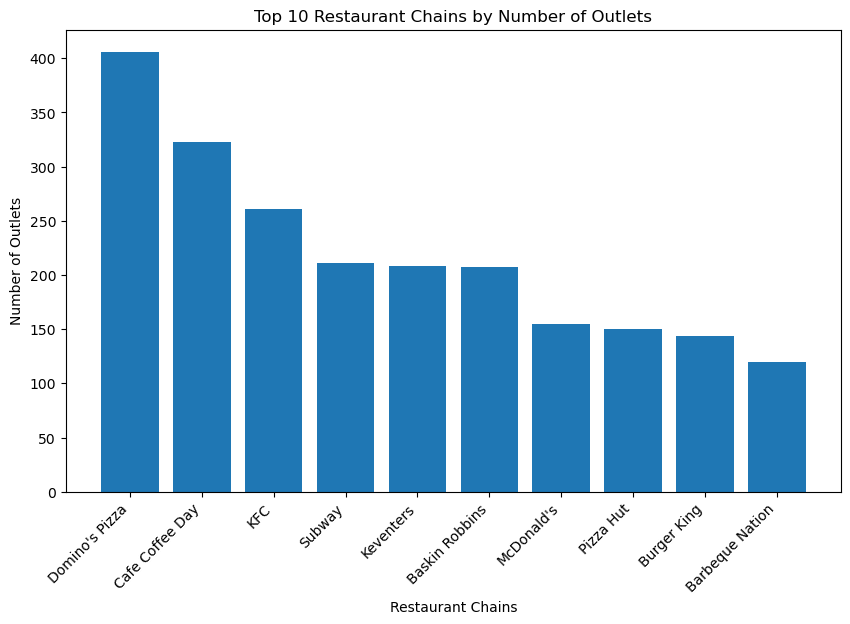

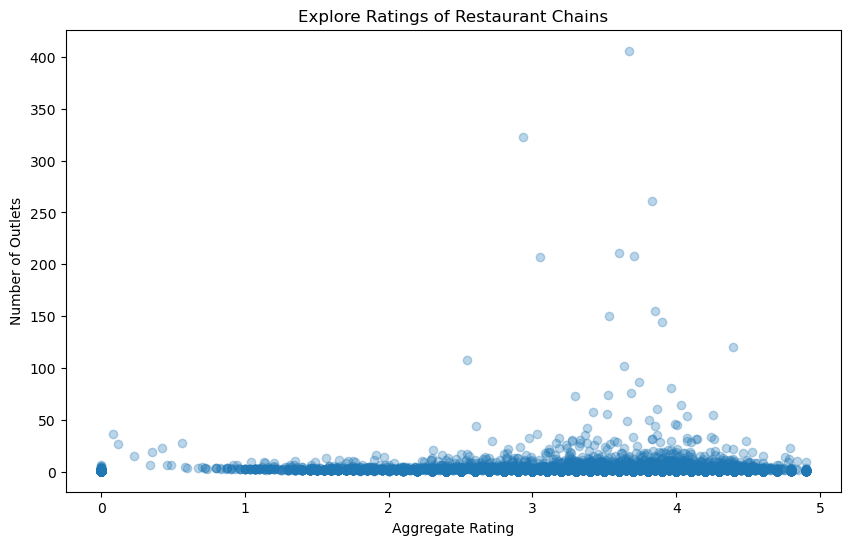

In [177]:
top_chains = outlet_rating.nlargest(10, 'count')  
plt.figure(figsize=(10, 6))
plt.bar(top_chains['name'], top_chains['count'])
plt.xlabel('Restaurant Chains')
plt.ylabel('Number of Outlets')
plt.title('Top 10 Restaurant Chains by Number of Outlets')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(outlet_rating['aggregate_rating'], outlet_rating['count'], alpha=0.3)
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Outlets')
plt.title('Explore Ratings of Restaurant Chains')
plt.show()

# Top Restaurant Chains and Their Ratings

- The top 3 restaurants with the most chains are:
  1. Domino's Pizza
  2. Cafe Coffee Day
  3. KFC

- Each of these chains has over 200 outlets across the country.

- From the graph, we observe that restaurants with more outlets tend to have higher ratings.


# Analyze the distribution of restaurants based on features like Wi-Fi, Alcohol availability, etc. Investigate if the presence of certain features correlates with higher ratings.

In [178]:
data.highlights = data.highlights.apply(lambda x: x[:-1])
data.highlights = data.highlights.apply(lambda x: x[1:])


In [179]:
data.highlights = data.highlights.apply(lambda x: x.split(",") if len(x) > 1 else x)

In [180]:
unique_highlights = set()
data.highlights.apply(lambda x: [unique_highlights.add(i) for i in x ])
unique_highlights

{" '4/5 Star'",
 " 'Above 18 Only'",
 " 'Air Conditioned'",
 " 'Alipay Accepted'",
 " 'All Day Breakfast'",
 " 'Available for Functions'",
 " 'Axis Bank - Dining Delights'",
 " 'BYOB'",
 " 'Beer'",
 " 'Bira 91 Beer'",
 " 'Board Games'",
 " 'Breakfast'",
 " 'Brunch'",
 " 'Buffet'",
 " 'Bulk Orders Accepted'",
 " 'Card Upon Delivery'",
 " 'Cash'",
 " 'Catering Available'",
 " 'Celebrity Frequented'",
 " 'City View'",
 " 'Couple Entry Only'",
 " 'Craft Beer'",
 " 'Credit Card'",
 " 'DJ'",
 " 'Dance Floor'",
 " 'Dark Kitchen'",
 " 'Debit Card'",
 " 'Delivery'",
 " 'Desserts and Bakes'",
 " 'Digital Payments Accepted'",
 " 'Dinner'",
 " 'Disabled Friendly'",
 " 'Drive Thru'",
 " 'Drive in'",
 " 'Entry Fee'",
 " 'Free Parking'",
 " 'Free Wifi'",
 " 'Fullbar'",
 " 'Gaming Area'",
 " 'Gastro Pub'",
 " 'Gin Bar'",
 " 'Gluten Free Options'",
 " 'Group Meal'",
 " 'Halal'",
 " 'Home Baker'",
 " 'Hookah'",
 " 'Indoor Seating'",
 " 'Karaoke'",
 " 'Keto Options'",
 " 'Kid Friendly'",
 " 'LGBTQIA Frie

In [181]:
unique_highlights_count = {}

for i in unique_highlights:
    unique_highlights_count[i] = 0
    for j in data["highlights"]:
        if i in j:
            unique_highlights_count[i] += 1

In [182]:
unique_highlights_dict = remove_leading_spaces(unique_highlights_count)
unique_highlights_dict
def remove_quotes_from_keys(input_dict):
    return {key.strip("'"): value for key, value in input_dict.items()}
unique_highlights_dict = remove_quotes_from_keys(unique_highlights_dict)

In [183]:
unique_highlights_dict

df = pd.DataFrame(list(unique_highlights_dict.items()), columns=['highlights', 'highlights_count'])
df.sort_values(by = "highlights_count", ascending = False).head(30)

,highlights,highlights_count
81,Takeaway Available,44760
75,Indoor Seating,44704
65,Lunch,30392
68,Debit Card,27305
98,Pure Veg,15257
6,Dinner,13340
56,Cash,13023
5,Desserts and Bakes,13012
7,No Alcohol Available,12979
25,Table booking recommended,6923
